# Knight Tour Example

Lucerne University of Applied Sciences and Arts - School of Information Technology

A knight's tour is a sequence of moves of a knight on a chessboard such that the knight visits every cell exactly once. Here we explicitly ask for a closed tour, i.e. the knight must be able to jump from the final position back to the original position.

@author: Tobias Mérinat
@author: Marc Pouly
@author: Reza Kakooee

![title](chess.png)

In [5]:
import math
import time
import numpy as np

from itertools import product
from ortools.sat.python import cp_model

from IPython import display
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

In [19]:
# We only consider square chess boards
size = 6

if size % 2 != 0:
    print('Knight tours only exist for even board dimensions.')

# Number of cells on chess board
bsize = size * size
print(bsize)

36


## Auxiliary Methods

In [7]:
# Chess board cell number -> coordinates
def p2c(position):
    return position % size, int(position / size)

print('Coordinate of cell number 20 is', p2c(20))

Coordinate of cell number 20 is (2, 3)


In [8]:
# Coordinates -> chess board cell number
def c2p(x,y):
    return y*size+x

print('Cell number of coordinate (3, 2) is', c2p(3,2))

Cell number of coordinate (3, 2) is 15


In [9]:
# Chess rules, where the knight is allowed to jump from a given cell number
def knight_moves(position):
    # Convert position into coordinates (x,y)
    x, y = p2c(position)
    print(x,y)
    # Generate all possible moves
    moves = list(product((x-1, x+1), (y-2, y+2))) + list(product((x-2, x+2),(y-1, y+1)))  # all moves
    print(moves)
    # Filter moves that would leave the board
    onboard = (c2p(x,y) for x, y in moves if 0 <= x < size and 0 <= y < size)
    return set(sorted(onboard))

# For visual testing
print('From  0 you may want to jump to:', knight_moves(0))
print('From 17 you may want to jump to:', knight_moves(17))
# print('From  0 it is forbidden to jump to:', set(range(64)) - knight_moves(0))

0 0
[(-1, -2), (-1, 2), (1, -2), (1, 2), (-2, -1), (-2, 1), (2, -1), (2, 1)]
From  0 you may want to jump to: {8, 13}
5 2
[(4, 0), (4, 4), (6, 0), (6, 4), (3, 1), (3, 3), (7, 1), (7, 3)]
From 17 you may want to jump to: {9, 28, 4, 21}


## Constraint Model

In [10]:
model = cp_model.CpModel()

# board[i,j] = True means that Knight jumps from i to j
# board is an size * size array of Boolean decision variables
board = [[model.NewBoolVar(f"({i},{j})") for j in range(bsize)] for i in range(bsize)]

In [18]:
# Implement chess rules: for each start position, set all impossible end positions to false
for start in range(bsize):
    # Illegal end positions:
    illegal = set(range(bsize)) - knight_moves(start)    
    for unend in illegal:
        model.Add(board[start][unend] == 0)

0 0
[(-1, -2), (-1, 2), (1, -2), (1, 2), (-2, -1), (-2, 1), (2, -1), (2, 1)]
1 0
[(0, -2), (0, 2), (2, -2), (2, 2), (-1, -1), (-1, 1), (3, -1), (3, 1)]
2 0
[(1, -2), (1, 2), (3, -2), (3, 2), (0, -1), (0, 1), (4, -1), (4, 1)]
3 0
[(2, -2), (2, 2), (4, -2), (4, 2), (1, -1), (1, 1), (5, -1), (5, 1)]
4 0
[(3, -2), (3, 2), (5, -2), (5, 2), (2, -1), (2, 1), (6, -1), (6, 1)]
5 0
[(4, -2), (4, 2), (6, -2), (6, 2), (3, -1), (3, 1), (7, -1), (7, 1)]
0 1
[(-1, -1), (-1, 3), (1, -1), (1, 3), (-2, 0), (-2, 2), (2, 0), (2, 2)]
1 1
[(0, -1), (0, 3), (2, -1), (2, 3), (-1, 0), (-1, 2), (3, 0), (3, 2)]
2 1
[(1, -1), (1, 3), (3, -1), (3, 3), (0, 0), (0, 2), (4, 0), (4, 2)]
3 1
[(2, -1), (2, 3), (4, -1), (4, 3), (1, 0), (1, 2), (5, 0), (5, 2)]
4 1
[(3, -1), (3, 3), (5, -1), (5, 3), (2, 0), (2, 2), (6, 0), (6, 2)]
5 1
[(4, -1), (4, 3), (6, -1), (6, 3), (3, 0), (3, 2), (7, 0), (7, 2)]
0 2
[(-1, 0), (-1, 4), (1, 0), (1, 4), (-2, 1), (-2, 3), (2, 1), (2, 3)]
1 2
[(0, 0), (0, 4), (2, 0), (2, 4), (-1, 1), (-1, 

In [13]:
# OR-Tools expects (x, y, var) triples
edges = [(start, end, board[start][end]) for start in range(bsize) for end in range(bsize)]

# No cycles, i.e. visit each cell exactly once
_ = model.AddCircuit(edges)

## Solve Model and Visualize

In [14]:
solver = cp_model.CpSolver()
status = solver.Solve(model)

In [15]:
if status == cp_model.FEASIBLE and size < 10:
    for r in range(bsize):
        for c in range(bsize):
            if solver.Value(board[r][c]) == True:
                print('Jump from {:02d} to {:02d}'.format(r, c))

Jump from 00 to 08
Jump from 01 to 12
Jump from 02 to 13
Jump from 03 to 07
Jump from 04 to 15
Jump from 05 to 09
Jump from 06 to 19
Jump from 07 to 18
Jump from 08 to 16
Jump from 09 to 01
Jump from 10 to 02
Jump from 11 to 03
Jump from 12 to 25
Jump from 13 to 00
Jump from 14 to 06
Jump from 15 to 11
Jump from 16 to 05
Jump from 17 to 04
Jump from 18 to 31
Jump from 19 to 30
Jump from 20 to 28
Jump from 21 to 32
Jump from 22 to 14
Jump from 23 to 10
Jump from 24 to 20
Jump from 25 to 33
Jump from 26 to 34
Jump from 27 to 35
Jump from 28 to 17
Jump from 29 to 21
Jump from 30 to 26
Jump from 31 to 27
Jump from 32 to 24
Jump from 33 to 29
Jump from 34 to 23
Jump from 35 to 22


### Prepare Datastructure for Visualization

In [16]:
START_POINT = 0

start = START_POINT
starts_list = [start]
ends_list = []

if status == cp_model.FEASIBLE:
    while True:
        end = [end for end in range(bsize) if solver.Value(board[start][end]) == True][0]
        ends_list.append(end)
        start = end
        starts_list.append(end)
        if start == START_POINT:
              break
    print('Sequence of moves:', starts_list[:20], '...')
else:
    print('No solution found.')

Sequence of moves: [0, 8, 16, 5, 9, 1, 12, 25, 33, 29, 21, 32, 24, 20, 28, 17, 4, 15, 11, 3] ...


# Visualization

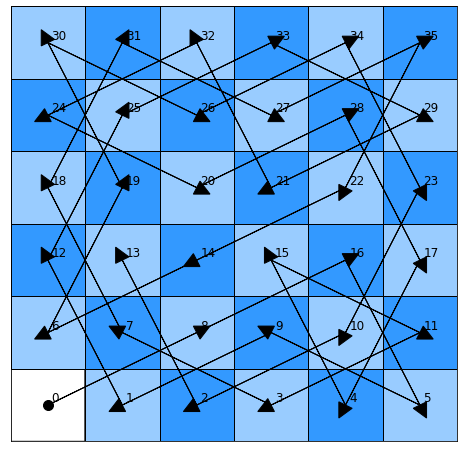

In [17]:
if status == cp_model.FEASIBLE:
    
    rect_coordinates  = [p2c(i) for i in starts_list]
    arrow_coordinates = [(p2c(i)[0]+0.5, p2c(i)[1]+0.5) for i in starts_list]
    
    chessboard = np.zeros((size, size))
    EVEN_COLOR = '#99CCFF'
    ODD_COLOR = '#3399FF' 
    rect_w = 1
    rect_h = 1
    rect_shift_x = 0
    rect_shift_y = 0
    fig, ax = plt.subplots(figsize=(8,8))
    plt.xticks([])
    plt.yticks([])
    c = ax.pcolor(chessboard, edgecolors='k', linewidths=1, cmap='binary')

    for p in range(bsize):
        plt.text(p2c(p)[0]+0.55, p2c(p)[1]+0.55, str(p), fontsize=12)
        
    for t in range(bsize-1):    
        
        # Special layout for start cell
        if t == 0:      
            rect_xy = rect_coordinates[t]
            rect = patches.Rectangle((rect_xy[0]+rect_shift_x, rect_xy[1]+rect_shift_y), rect_w, rect_h, linewidth=1, facecolor='None')
            ax.add_patch(rect)
            plt.scatter(rect_xy[0]+0.5, rect_xy[1]+0.5, c='k', marker='o', s=100)
    
        # Color rectanges
        rect_xy = rect_coordinates[t+1]
        color = EVEN_COLOR if t % 2 == 0 else ODD_COLOR 
        rect = patches.Rectangle((rect_xy[0]+rect_shift_x, rect_xy[1]+rect_shift_y), rect_w, rect_h, linewidth=1, edgecolor='black', facecolor=color)
        ax.add_patch(rect)
        
        # Draw arrow
        arrow_start = arrow_coordinates[t]
        arrow_stop = arrow_coordinates[t+1]
        diff = (arrow_stop[0] - arrow_start[0], arrow_stop[1] - arrow_start[1])
        plt.arrow(arrow_start[0], arrow_start[1], diff[0], diff[1], head_width=0.2, head_length=0.2, fc='k', ec='k')
        
        # Update animation
        time.sleep(.01)
        display.display(plt.gcf())
        display.clear_output(wait=True)
    